In [73]:
import random
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def random_walk(n):
    x, y = 0, 0
    positions = set()
    positions.add((x, y))
    for _ in range(n):
        dx, dy = random.choice([(0, 1), (0, -1), (1, 0), (-1, 0)])
        x += dx
        y += dy
        positions.add((x, y))
    return positions

def simulate_walks(number_of_walks, walk_length, grid_size):
    visits = np.zeros((2 * grid_size + 1, 2 * grid_size + 1))
    origin = grid_size  # Center of the grid
    for _ in range(number_of_walks):
        positions = random_walk(walk_length)
        for (x, y) in positions:
            visits[origin + x][origin + y] += 1

    average_visits = visits / number_of_walks
    return average_visits


# Plot the heatmap of visit probabilities
def plot_heatmap(visit_counts, walk_length, number_of_walks, grid_size):
    plt.figure(figsize=(10, 8))
    sns.heatmap(visit_counts, cmap='viridis', cbar=True,
                xticklabels=range(-grid_size, grid_size + 1),
                yticklabels=range(-grid_size, grid_size + 1))
    plt.title(f"Heatmap of Visit Probabilities for {number_of_walks} Random Walks (Length {walk_length})")
    plt.xlabel("X-coordinate")
    plt.ylabel("Y-coordinate")
    plt.show()



## For each intersection in the grid, what is the probability that the walker visits it?

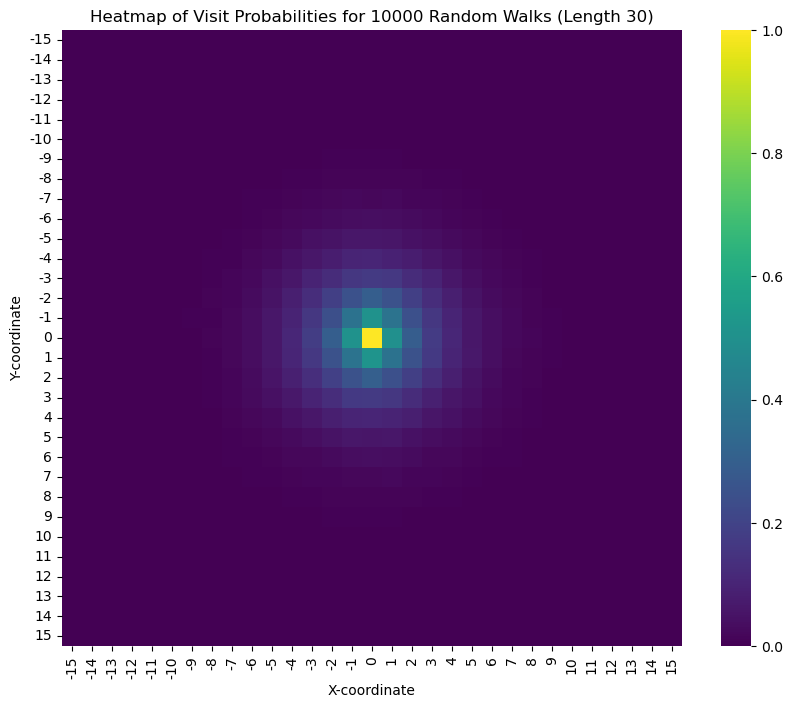

In [74]:

# Main code to perform the simulation and plotting
number_of_walks = 10000
walk_length = 30
grid_size = 15  # This will create a 30x30 grid

visits = simulate_walks(number_of_walks, walk_length, grid_size)
plot_heatmap(visits, walk_length, number_of_walks, grid_size)

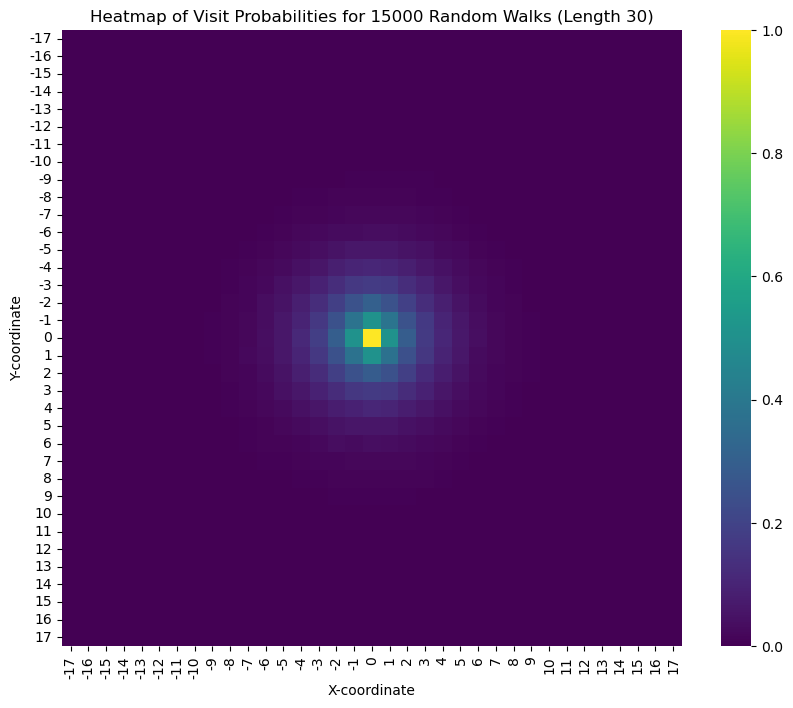

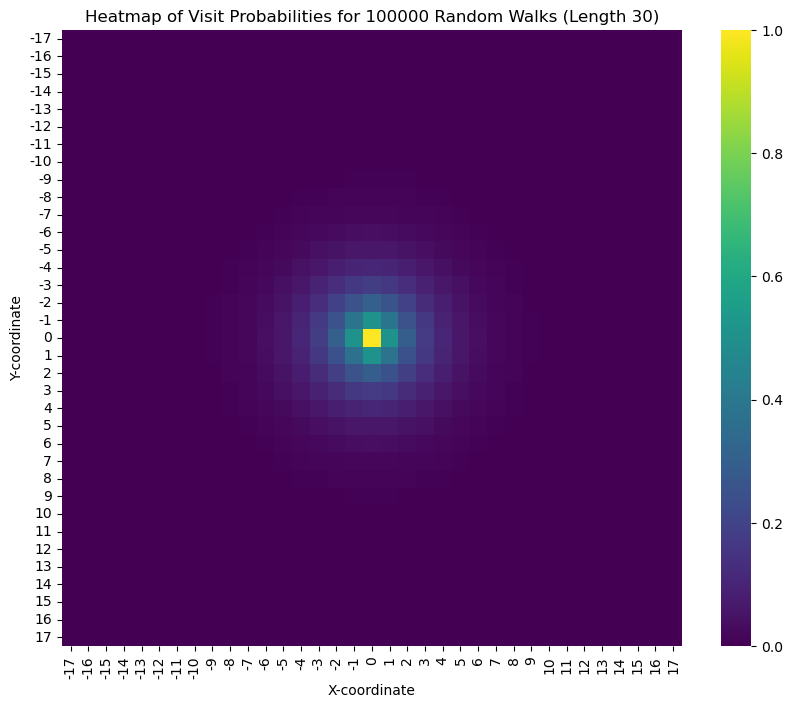

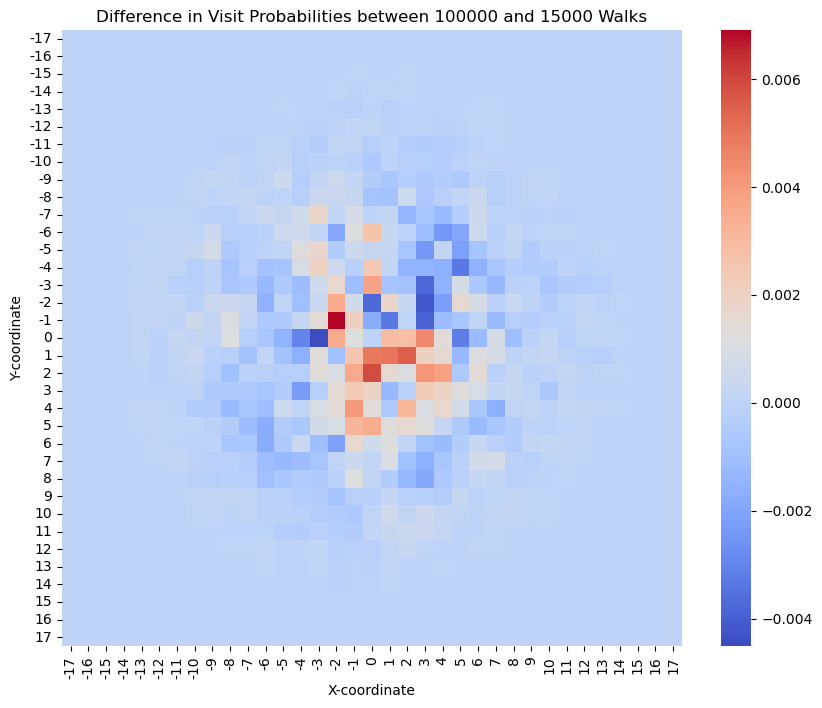

In [79]:
def simulate_and_compare(number_of_walks_1, number_of_walks_2, walk_length, grid_size):
    visits_1 = simulate_walks(number_of_walks_1, walk_length, grid_size)
    visits_2 = simulate_walks(number_of_walks_2, walk_length, grid_size)

    difference = visits_2 - visits_1

    return visits_1, visits_2, difference

walk_length = 30
grid_size = 17
number_of_walks_1 = 15000
number_of_walks_2 = 100000

visits_1, visits_2, difference = simulate_and_compare(number_of_walks_1, number_of_walks_2, walk_length, grid_size)

# Plot heatmaps
plt.figure(figsize=(10, 8))
sns.heatmap(visits_1, cmap='viridis', cbar=True,
            xticklabels=range(-grid_size, grid_size + 1),
            yticklabels=range(-grid_size, grid_size + 1))
plt.title(f"Heatmap of Visit Probabilities for {number_of_walks_1} Random Walks (Length {walk_length})")
plt.xlabel("X-coordinate")
plt.ylabel("Y-coordinate")
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(visits_2, cmap='viridis', cbar=True,
            xticklabels=range(-grid_size, grid_size + 1),
            yticklabels=range(-grid_size, grid_size + 1))
plt.title(f"Heatmap of Visit Probabilities for {number_of_walks_2} Random Walks (Length {walk_length})")
plt.xlabel("X-coordinate")
plt.ylabel("Y-coordinate")
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(difference, cmap='coolwarm', cbar=True,
            xticklabels=range(-grid_size, grid_size + 1),
            yticklabels=range(-grid_size, grid_size + 1))
plt.title(f"Difference in Visit Probabilities between {number_of_walks_2} and {number_of_walks_1} Walks")
plt.xlabel("X-coordinate")
plt.ylabel("Y-coordinate")
plt.show()

The difference in visit probabilities between the two walks is very small $|\epsilon| < 0.006$. So The run with 15000 walk is is very close to the run with 100000 walks. So 15000 is enough to get a good estimate of the visit probabilities.